# Importing Libraries

In [3]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing and helper libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#LOADING DIFFERENT ML MODELS
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression




## Loading Data to DataFrame

In [9]:
train_data  = pd.read_csv("./TitanicDataset/train.csv")
test_data = pd.read_csv("./TitanicDataset/test.csv")
Id = test_data["PassengerId"]

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Checking for null, missing, categorical values on train & test data

In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [55]:
#printing only top 5 values
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
#Storing both dataFrames as list dsp that they can be iterated over
data = [train_data, test_data]

## **The attributes have the following meaning:**
1. **Survived:** that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
2. **Pclass:** passenger class.
3. **Name, Sex, Age:** self-explanatory
4. **SibSp:** how many siblings & spouses of the passenger aboard the Titanic.
5. **Parch:** how many children & parents of the passenger aboard the Titanic.
6. **Ticket:** ticket id
7. **Fare:** price paid (in pounds)
8. **Cabin:** passenger's cabin number
9. **Embarked:** where the passenger embarked the Titanic

In [57]:
print("Training data with null values:\n",train_data.isnull().sum())
print("\n\n\nTesting data with null values:\n",test_data.isnull().sum())

Training data with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



Testing data with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Handling missing data:

In [58]:
for data_ in data:
    # filling median of age at null values , and not mean because mean can get affected by outliers which are very few elderly people in this case
    data_["Age"].fillna(data_["Age"].median(), inplace=True)
    # Filling null cabin with mode  (which are most frequent ie cabins type in which most of people out of all passengers are staying are staying)
    data_["Cabin"].fillna(data_["Cabin"].mode()[0], inplace=True)
    # Filling fare with mean as fares are continous not discrete  
    data_["Fare"].fillna(data_["Fare"].mean(), inplace=True)
    # Filling embarked with mode ie same as  from where most people have embarked from.
    data_["Embarked"].fillna(data_["Embarked"].mode()[0], inplace=True)

    

## Double checking whether all missing values are handled

In [59]:
print("Training data with null values:\n",train_data.isnull().sum())
print("\n\n\nTesting data with null values:\n",test_data.isnull().sum())

Training data with null values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64



Testing data with null values:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Data cleaned so now  we'll see some stats of the dataset


In [60]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Some small inferences from above data:
   ### - there are only 25% of people who are paying higher than mean fare (must be rich people or boarded much before)
   ### - average survival chance is 38%.
   ### - 75% of people are younger than 35 years
   ### - less than 25% people are with children and parents as 75% of Parch and SibSp is 0 & 1 respectively. 

# Feature Enginneering :
###   -Creating new Features

## Few features which would be better for models to learn :
1. *If you have a family then you will be having more chance of surviving*
2. *If instead of age we created a age bins then it would be easier to predict that if a person is belonging to this age bucket he is likely to survive or not and same with fare.*
3. *Being alone or being with other family is surely affect whether he/she will survive or not*
4. *Paying high fare can mean you are belonging to high class or are a VIP then they will be rescued first.*

In [61]:

for data_ in data:
    
    #adding sibling, cousins, parents and the person to get the size of the family onboard
    data_["familysize"] = data_["SibSp"] + data_["Parch"] + 1;
    
    #Dividing age into bins of age-gap as it will be more categorical as compared to a continuos value like age
    data_["agebin"] = pd.cut(data_["Age"].astype(int), 5)
    
    #Creating bins for fares also 
    data_["farebin"] = pd.qcut(data_["Fare"],5)
    
    #Assigning 1 to everyone ie everyone is alone and then cheking if its family size if >1 then it is not alone so the value is set to 0 
    data_["alone"] = 1
    data_["alone"].loc[data_["familysize"] > 1] = 0

    
#Printing newly created features along with their values   
print("FamilySize :\n", data[0].familysize.value_counts())
print("\n\n\nAlone :\n", data[0].alone.value_counts())
print("\n\n\nAgeBin :\n", data[0].agebin.value_counts())
print("\n\n\nFareBin :\n", data[1].farebin.value_counts())

FamilySize :
 1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: familysize, dtype: int64



Alone :
 1    537
0    354
Name: alone, dtype: int64



AgeBin :
 (16.0, 32.0]     525
(32.0, 48.0]     186
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: agebin, dtype: int64



FareBin :
 (11.342, 21.679]    85
(-0.001, 7.796]     85
(46.34, 512.329]    84
(21.679, 46.34]     82
(7.796, 11.342]     82
Name: farebin, dtype: int64


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [62]:
data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize,agebin,farebin,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,2,"(16.0, 32.0]","(-0.001, 7.854]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(32.0, 48.0]","(39.688, 512.329]",0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1,"(16.0, 32.0]","(7.854, 10.5]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,"(32.0, 48.0]","(39.688, 512.329]",0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,"(32.0, 48.0]","(7.854, 10.5]",1


In [63]:
data[1].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize,agebin,farebin,alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q,1,"(30.4, 45.6]","(7.796, 11.342]",1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S,2,"(45.6, 60.8]","(-0.001, 7.796]",0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q,1,"(60.8, 76.0]","(7.796, 11.342]",1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S,1,"(15.2, 30.4]","(7.796, 11.342]",1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S,3,"(15.2, 30.4]","(11.342, 21.679]",0


## Handling Categorical Datatypes:

In [64]:
label = LabelEncoder()

for data_ in data:
    data_["Sex"] = label.fit_transform(data_["Sex"])
    data_["Embarked"] = label.fit_transform(data_["Embarked"])
    data_["Cabin"] = label.fit_transform(data_["Cabin"])
    data_["agebin"] = label.fit_transform(data_["agebin"])
    data_["farebin"] = label.fit_transform(data_["farebin"])

In [65]:
data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize,agebin,farebin,alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,47,2,2,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,2,2,4,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,47,2,1,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,2,2,4,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,47,2,1,2,1,1


## Double checking data

In [66]:
print("Training data with null values:\n",train_data.info())
print("\n\n\nTesting data with null values:\n",test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
 12  familysize   891 non-null    int64  
 13  agebin       891 non-null    int64  
 14  farebin      891 non-null    int64  
 15  alone        891 non-null    int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 111.5+ KB
Training data with null values:
 None
<class 'pandas.core.frame.DataFrame'

# Some Visualization to gain some new insights:

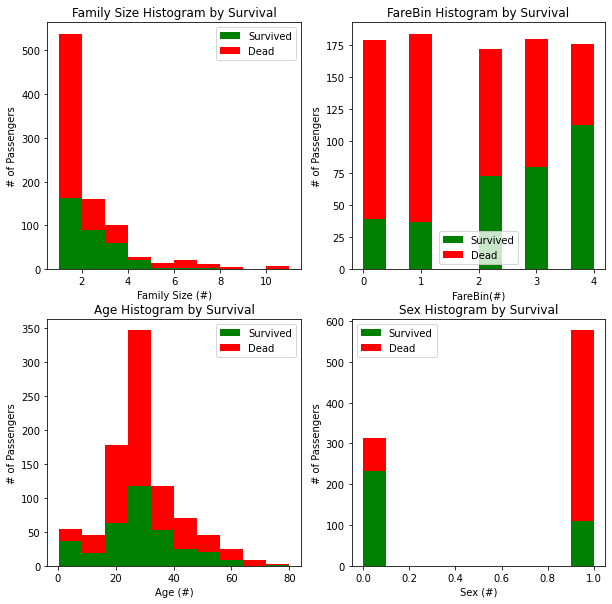

In [103]:
#Plotting histograms for various features

plt.figure(figsize=(10,10))

plt.subplot(221)
plt.hist(x = [train_data[train_data['Survived']==1]['familysize'], train_data[train_data['Survived']==0]['familysize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(222)
plt.hist(x = [train_data[train_data['Survived']==1]['farebin'], train_data[train_data['Survived']==0]['farebin']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('FareBin Histogram by Survival')
plt.xlabel('FareBin(#)')
plt.ylabel('# of Passengers')
plt.legend()


plt.subplot(223)
plt.hist(x = [train_data[train_data['Survived']==1]['Age'], train_data[train_data['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (#)')
plt.ylabel('# of Passengers')
plt.legend()


plt.subplot(224)
plt.hist(x = [train_data[train_data['Survived']==1]['Sex'], train_data[train_data['Survived']==0]['Sex']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Sex Histogram by Survival')
plt.xlabel('Sex (#)')
plt.ylabel('# of Passengers')
plt.legend()


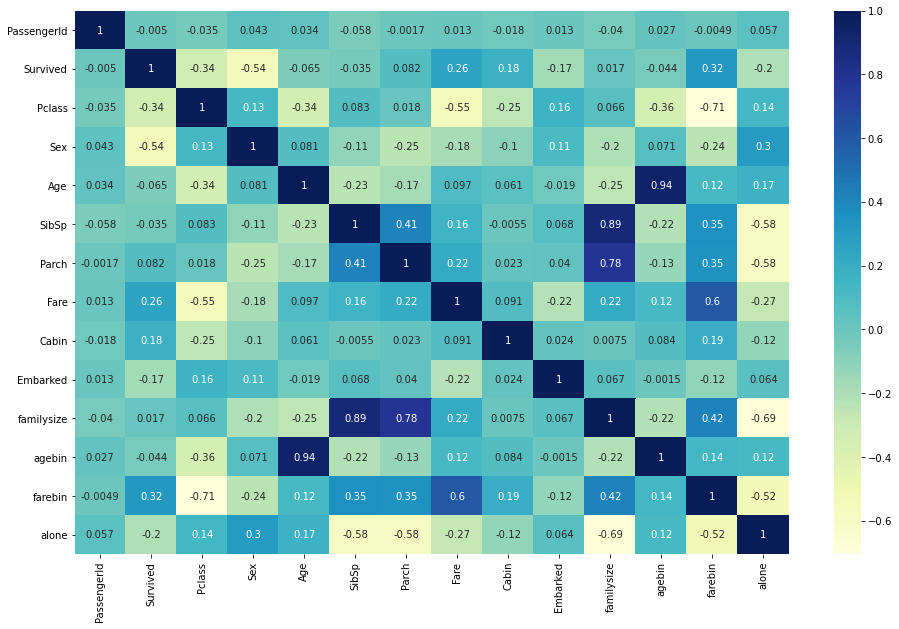

In [115]:
plt.figure(figsize = (16,10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

## From above analysis we can see that survival is very much correlated with:
### 1. farebin
### 2. Fare
### 3. Sex
### 4. Pclass
### 5. Cabin
### 6. Alone

## Dropping unwanted columns

In [116]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'familysize', 'agebin',
       'farebin', 'alone'],
      dtype='object')

In [117]:
clean_train = np.array( train_data.drop(columns=['PassengerId', 'Survived', 'Name','Ticket']))
clean_target = np.array( train_data["Survived"] )
clean_test_data = np.array( test_data.drop(columns=['PassengerId','Name','Ticket']))

In [118]:
print(clean_train.shape, clean_test_data.shape)

(891, 12) (418, 12)


# Select and Train Model

In [119]:
#SPLITTING DATA
X_train, X_test, y_train, y_test = train_test_split(clean_train, clean_target, test_size=0.25, random_state=42)

In [120]:
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(668, 12) (668,) (223, 12) (223,)


## Initializing Estimators

In [125]:
random_forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=10, random_state=42)
lg_reg_clf = LogisticRegression(random_state=42)
bag_clf = BaggingClassifier(n_estimators=10, random_state=42)
ada_clf = AdaBoostClassifier(n_estimators=10, random_state=42)
grad_clf = GradientBoostingClassifier(n_estimators=10, random_state=42)
xgb_clf = XGBClassifier(n_estimators=10, random_state=42)

In [126]:
# Helping_Function to show Cross Val Scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [127]:
#FITTING EACH ESTIMATOR 
estimators = [random_forest_clf, extra_trees_clf, lg_reg_clf, bag_clf, ada_clf, grad_clf, xgb_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)
    
# STORING CROSS VAL-SCORE IN A LIST SCORES
scores= []
for estimator in estimators:
    scores.append(cross_val_score(estimator, X_train, y_train, cv=7))


Training the RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Training the ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
      

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [128]:
# PRINTING ACCURACY AND MEAN OF EACH ESTIMATORS
i = 0
for score in scores:
    print("-"*10 +estimators[i].__class__.__name__ + "-"*10 + "\n")
    display_scores(score)
    print("\n\n")
    i = i+1

----------RandomForestClassifier----------

Scores: [0.77083333 0.75       0.82291667 0.78947368 0.82105263 0.78947368
 0.83157895]
Mean: 0.7964755639097746
Standard deviation: 0.0279053665314265



----------ExtraTreesClassifier----------

Scores: [0.77083333 0.76041667 0.77083333 0.74736842 0.77894737 0.8
 0.82105263]
Mean: 0.7784931077694236
Standard deviation: 0.02294998900726199



----------LogisticRegression----------

Scores: [0.79166667 0.73958333 0.875      0.74736842 0.74736842 0.76842105
 0.85263158]
Mean: 0.7888627819548873
Standard deviation: 0.05040384608261781



----------BaggingClassifier----------

Scores: [0.79166667 0.72916667 0.80208333 0.77894737 0.82105263 0.84210526
 0.88421053]
Mean: 0.8070332080200501
Standard deviation: 0.04550600627348293



----------AdaBoostClassifier----------

Scores: [0.83333333 0.78125    0.86458333 0.74736842 0.75789474 0.78947368
 0.87368421]
Mean: 0.8067982456140351
Standard deviation: 0.04689390768323921



----------GradientBoost

## All estimators:

In [129]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("lg_reg_clf", lg_reg_clf),
    ("bag_clf", bag_clf),
    ("ada_clf", ada_clf),
    ("grad_clf", grad_clf),
    ("xgb_clf", xgb_clf),
    
]

In [130]:
# As we have seen above , the accuracy of some models are low as compared to others and they might be reducing the accuracy of your voting model so I have created a new list containing only top 4 classifiers.
selected_named_estimators = [
    ("bag_clf", bag_clf),
    ("ada_clf", ada_clf),
    ("grad_clf", grad_clf),
    ("xgb_clf", xgb_clf),
    
]

In [131]:
#Fitting both voting model , one with all estimators and one with selected estimators

all_estimators_voting_clf = VotingClassifier(named_estimators, voting="soft")
all_estimators_voting_clf.fit(X_train, y_train)

selected_estimators_voting_clf = VotingClassifier(selected_named_estimators, voting = "soft")
selected_estimators_voting_clf.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('bag_clf',
                              BaggingClassifier(base_estimator=None,
                                                bootstrap=True,
                                                bootstrap_features=False,
                                                max_features=1.0,
                                                max_samples=1.0,
                                                n_estimators=10, n_jobs=None,
                                                oob_score=False,
                                                random_state=42, verbose=0,
                                                warm_start=False)),
                             ('ada_clf',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=10,
                   

## CV SCORE:

In [132]:
all_estimators_voting_scores = cross_val_score(all_estimators_voting_clf, X_train ,y_train, cv=7)
selected_estimators_voting_scores = cross_val_score(selected_estimators_voting_clf, X_train ,y_train, cv=7)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## Accuracy with all estimators and selected estimators respectively.

In [133]:
print("VOTING WITH ALL ESTIMATORS & WITHOUT TUNING :\n")
display_scores(all_estimators_voting_scores)

print("\n\n"+"%"*100+"\n\n\nVOTING WITH SELECTED ESTIMATORS & WITHOUT TUNING :\n")
display_scores(selected_estimators_voting_scores)


VOTING WITH ALL ESTIMATORS & WITHOUT TUNING :

Scores: [0.83333333 0.78125    0.83333333 0.78947368 0.82105263 0.82105263
 0.90526316]
Mean: 0.8263941102756893
Standard deviation: 0.03736844285217777


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


VOTING WITH SELECTED ESTIMATORS & WITHOUT TUNING :

Scores: [0.83333333 0.78125    0.82291667 0.81052632 0.84210526 0.84210526
 0.91578947]
Mean: 0.8354323308270676
Standard deviation: 0.03829100725964662


# Tuning hyperparams


In [134]:
# Setting values for all the parameters

grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

# You can use google and  references for getting all parameters 
grid_param = [
             [{
            #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
            
            
            [{
            #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],
            
            [{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
      
            [{
            #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

    
            [{
            #AdaBoostClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
    
            [{
            #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
    
            
        ]


## **This is for finding best params using gridsearchCV and its a bit time consuming so i have commented it**

In [135]:
# for clf, param in zip (named_estimators, grid_param):
#     best_search = GridSearchCV(estimator = clf[1], param_grid = param, cv = 10, scoring = 'roc_auc')
#     best_search.fit(X_train, y_train)
#     best_param = best_search.best_params_
#     print('The best parameter for {} is {} '.format(clf[1].__class__.__name__, best_param))


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} is 
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 300, 'random_state': 0} is 


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


The best parameter for LogisticRegression is {'fit_intercept': True, 'random_state': 0, 'solver': 'newton-cg'} is 
The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} is 
The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 0} is 
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'random_state': 0} is 
The best parameter for XGBClassifier is {'learning_rate': 0.25, 'max_depth': 6, 'n_estimators': 100, 'seed': 0} is 


## Now After we get the best parameters , we build our final voting model:
        The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} 
        The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 300, 'random_state': 0}
        The best parameter for LogisticRegression is {'fit_intercept': True, 'random_state': 0, 'solver': 'newton-cg'} 
        The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0}  
        The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 0}  
        The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'random_state': 0} 
        The best parameter for XGBClassifier is {'learning_rate': 0.25, 'max_depth': 6, 'n_estimators': 100, 'seed': 0}
        
      
      


## Making final estimators which are tuned ie having right parameters and their right values.

In [ ]:
best_random_forest_clf = RandomForestClassifier( criterion="entropy", n_estimators=100, max_depth=8, oob_score=True, random_state=0)
best_extra_trees_clf = ExtraTreesClassifier( criterion="entropy", n_estimators=300, max_depth=6, random_state=0)
best_lg_reg_clf = LogisticRegression( fit_intercept= True, random_state= 0, solver= 'newton-cg')
best_bag_clf = BaggingClassifier( max_samples = 0.25, n_estimators= 300,  random_state=0)
best_ada_clf = AdaBoostClassifier( learning_rate=0.1, n_estimators=100, random_state=0)
best_grad_clf = GradientBoostingClassifier( learning_rate = 0.05, max_depth= 4, n_estimators=300, random_state=0)
best_xgb_clf = XGBClassifier( learning_rate=0.25, max_depth=6, n_estimators=100, seed=0)

In [ ]:
all_estimators_tuned = [
    ("random_forest_clf", best_random_forest_clf),
    ("extra_trees_clf", best_extra_trees_clf),
    ("lg_reg_clf", best_lg_reg_clf),
    ("bag_clf", best_bag_clf),
    ("ada_clf", best_ada_clf),
    ("grad_clf", best_grad_clf),
    ("xgb_clf", best_xgb_clf),
]

## LETS CHECK ONE BY ONE THE ACCURACY OF THE TUNED MODELS

In [ ]:
estimators = [best_random_forest_clf, best_extra_trees_clf, best_lg_reg_clf, best_bag_clf, best_ada_clf, best_grad_clf, best_xgb_clf]
for estimator in estimators:
    print("Training the", estimator)
#     estimator.fit(X_train, y_train)
    estimator.fit(clean_train, clean_target)
scores= []
for estimator in estimators:
    scores.append(cross_val_score(estimator, X_train, y_train, cv=7))



In [ ]:
i = 0
for score in scores:
    print("-"*10 +estimators[i].__class__.__name__ + "-"*10 + "\n")
    display_scores(score)
    print("\n\n")
    i = i+1

## ----------RandomForestClassifier----------

Scores: [0.82291667 0.80208333 0.89583333 0.75789474 0.83157895 0.8
 0.89473684]
### Mean: 0.8292919799498747
Standard deviation: 0.046984121019082115



## ----------ExtraTreesClassifier----------

Scores: [0.80208333 0.80208333 0.90625    0.78947368 0.8        0.77894737
 0.90526316]
### Mean: 0.8263001253132832
Standard deviation: 0.050836173770773097



## ----------LogisticRegression----------

Scores: [0.82291667 0.76041667 0.89583333 0.75789474 0.74736842 0.74736842
 0.87368421]
### Mean: 0.8007832080200501
Standard deviation: 0.058571238717743335



## ----------BaggingClassifier----------

Scores: [0.80208333 0.80208333 0.85416667 0.82105263 0.83157895 0.81052632
 0.89473684]
### Mean: 0.8308897243107769
Standard deviation: 0.031144361211338737



## ----------AdaBoostClassifier----------

Scores: [0.79166667 0.78125    0.88541667 0.76842105 0.77894737 0.74736842
 0.89473684]
### Mean: 0.806829573934837
Standard deviation: 0.054216639375005905



## ----------GradientBoostingClassifier----------

Scores: [0.82291667 0.73958333 0.88541667 0.78947368 0.82105263 0.82105263
 0.89473684]
### Mean: 0.8248903508771929
Standard deviation: 0.049435306018664804



## ----------XGBClassifier----------

Scores: [0.83333333 0.75       0.83333333 0.8        0.8        0.81052632
 0.86315789]
### Mean: 0.8129072681704261
Standard deviation: 0.033070837849658676




## As we can see GradientBoosting_CLF, Bagging_CLF, ExtraTrees_CLF, RandomForest_CLF performed better than others, so we should remove other classifiers as they can have negative effect on our final voting model

In [ ]:
selected_estimators_tuned = [
    ("random_forest_clf", best_random_forest_clf),
    ("extra_trees_clf", best_extra_trees_clf),
    ("bag_clf", best_bag_clf),
    ("grad_clf", best_grad_clf),

]

## NOW fitting all models of all and selected estimators and with and without tuned parameters.

In [ ]:
all_estimators_tuned_voting_clf = VotingClassifier(all_estimators_tuned, voting="soft")
selected_estimators_tuned_voting_clf = VotingClassifier(selected_estimators_tuned, voting="soft")

In [ ]:
all_tuned_voting_clf_scores = cross_val_score(all_estimators_tuned_voting_clf,X_train, y_train,cv=7)
selected_tuned_voting_clf_scores = cross_val_score(selected_estimators_tuned_voting_clf,X_train, y_train,cv=7)

# Final Cross-Validation Scores of all models

In [ ]:
print("VOTING WITH ALL ESTIMATORS & WITHOUT TUNING :\n")
display_scores(all_estimators_voting_scores)

print("\n\n"+"%"*100+"\n\n\nVOTING WITH SELECTED ESTIMATORS & WITHOUT TUNING :\n")
display_scores(selected_estimators_voting_scores)

print("\n\n"+"%"*100+"\n\n\nVOTING WITH ALL ESTIMATORS & WITH TUNING :\n")
display_scores(all_tuned_voting_clf_scores)

print("\n\n"+"%"*100+"\n\n\nVOTING WITH SELECTED ESTIMATORS & WITH TUNING :\n")
display_scores(selected_tuned_voting_clf_scores)



# Now fitting all models to get our submission files

In [ ]:
all_estimators_voting_clf.fit(X_train, y_train)
selected_estimators_voting_clf.fit(X_train, y_train)
all_estimators_tuned_voting_clf.fit(X_train, y_train)
selected_estimators_tuned_voting_clf.fit(X_train, y_train)

In [ ]:
pred_allestimators_without_tuning = all_estimators_voting_clf.predict(clean_test_data)
pred_selectedestimators_without_tuning = selected_estimators_voting_clf.predict(clean_test_data)
pred_allestimators_with_tuning = all_estimators_tuned_voting_clf.predict(clean_test_data)
pred_selectedestimators_with_tuning = selected_estimators_tuned_voting_clf.predict(clean_test_data)


# Submissions with their scores:

In [ ]:
submission = pd.DataFrame({'PassengerId':Id, 'Survived':pred_allestimators_without_tuning})
submission.to_csv('submission_pred_allestimators_without_tuning.csv', index = False) 

## Submission Score :0.77511

In [ ]:
submission = pd.DataFrame({'PassengerId':Id, 'Survived':pred_selectedestimators_without_tuning})
submission.to_csv('submission_pred_selectedestimators_without_tuning.csv', index = False)

## Submission Score :0.78468

In [ ]:

submission = pd.DataFrame({'PassengerId':Id, 'Survived':pred_allestimators_with_tuning})
submission.to_csv('submission_pred_allestimators_with_tuning.csv', index = False)

## Submission Score :0.78468


In [ ]:

submission = pd.DataFrame({'PassengerId':Id, 'Survived':pred_selectedestimators_with_tuning})
submission.to_csv('submission_pred_selectedestimators_with_tuning.csv', index = False)

## Submission Score :0.77033